In [8]:
import pandas as pd
data = pd.read_table("proteinGroups.txt")
data.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions
0,V9GYJ8;A0A024R0T9;K7ER74;P02655,V9GYJ8;A0A024R0T9;K7ER74;P02655,2;2;2;2,2;2;2;2,2;2;2;2,Apolipoprotein C-II;Proapolipoprotein C-II,APOC2;APOC4-APOC2,V9GYJ8_HUMAN Apolipoprotein C-II OS=Homo sapie...,4,2,...,4916;4917,True;True,5618;5619;5620,146495;146496;146497;146498;146499;146500;1465...,186411;186412;186413;186414;186415;186416;1864...,186411;186418,NaN,NaN,NaN,NaN
1,A0A024R6I7;A0A0G2JRN3;G3V2B9;G3V544;G3V5R8;G3V...,A0A024R6I7;A0A0G2JRN3,50;42;12;5;3;3;3,3;3;0;0;0;0;0,3;3;0;0;0;0;0,NaN,SERPINA1,A0A024R6I7_HUMAN Alpha-1-antitrypsin OS=Homo s...,7,50,...,479;480;490;491;1032;1033;1259;1603;1604;1605;...,False;False;False;False;True;True;False;False;...,544;545;555;556;557;558;1171;1172;1419;1806;18...,15231;15232;15233;15234;15235;15236;15237;1523...,20602;20603;20604;20605;20606;20607;20608;2060...,20608;20612;20883;21118;39619;39647;47955;6227...,0;341;342;343,0;1;2;3;4;5,129;133;135;338,250;266;375;382;398;409
2,A0A075B6I0,A0A075B6I0,2,2,2,NaN,IGLV8-61,LV861_HUMAN Immunoglobulin lambda variable 8-6...,1,2,...,1694;4891,True;True,1915;5589,51669;51670;51671;51672;51673;51674;51675;5167...,66828;66829;66830;66831;66832;66833;185108,66828;185108,NaN,NaN,NaN,NaN
3,A0A075B6J9,A0A075B6J9,2,2,2,NaN,IGLV2-18,LV218_HUMAN Immunoglobulin lambda variable 2-1...,1,2,...,3270;5804,True;True,3693;6630,96628;96629;96630;96631;96632;96633;96634;9663...,120816;230471;230472;230473;230474;230475;230476,120816;230473,NaN,NaN,NaN,NaN
4,A0A075B6K4,A0A075B6K4,2,2,1,NaN,IGLV3-10,LV310_HUMAN Immunoglobulin lambda variable 3-1...,1,2,...,2623;4664,True;True,2952;5319,76447;76448;76449;76450;76451;76452;76453;7645...,96927;96928;96929;96930;96931;170193;170194;17...,96927;170196,NaN,NaN,NaN,NaN


In [9]:
dataLFQ=data.set_index('Protein IDs')
dataLFQ=dataLFQ.filter(regex='^LFQ', axis=1)
dataLFQ=dataLFQ.rename(columns = lambda x : x.replace('LFQ intensity 60313_AnneMari_',''))

In [10]:
dataLFQ+=1
import numpy as np
dataLFQ=np.log2(dataLFQ)
dataLFQ.head()

,01_redo-t1,01_redo-t2,01-t1,01-t2,02_redo-t1,02_redo-t2,02-t1,02-t2,10,10_redo,...,53_redo_t2,53_redo_t3,53_t1,6,7,7_redo,8,8_redo,9,9_redo
Protein IDs,,,,,,,,,,,,,,,,,,,,,
V9GYJ8;A0A024R0T9;K7ER74;P02655,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
A0A024R6I7;A0A0G2JRN3;G3V2B9;G3V544;G3V5R8;G3V387;A0A0B4J278,0.0,16.288776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.340685,...,14.127269,14.449149,0.0,0.000000,0.0,15.962309,0.0,0.0,0.0,16.747288
A0A075B6I0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,14.819580,14.565876,0.0,13.329376,0.0,15.471485,0.0,0.0,0.0,0.000000
A0A075B6J9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,13.917279,13.030788,0.0,0.000000,0.0,14.272703,0.0,0.0,0.0,0.000000
A0A075B6K4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,13.423772,14.279538,0.0,0.000000,0.0,14.586840,0.0,0.0,0.0,0.000000


([array([669.,   0.,   3.,   1.,   2.,   5.,   4.,   0.,   3.,   0.]),
  array([523.,   9.,  10.,  14.,  23.,  24.,  28.,  25.,  20.,  11.]),
  array([671.,   0.,   5.,   1.,   2.,   3.,   2.,   0.,   2.,   1.]),
  array([674.,   1.,   1.,   3.,   0.,   3.,   1.,   1.,   2.,   1.]),
  array([671.,   0.,   1.,   2.,   4.,   3.,   3.,   1.,   1.,   1.]),
  array([554.,   3.,   5.,  12.,  18.,  31.,  13.,  25.,  17.,   9.]),
  array([680.,   0.,   0.,   1.,   1.,   0.,   4.,   0.,   0.,   1.]),
  array([680.,   1.,   1.,   2.,   1.,   1.,   0.,   0.,   1.,   0.]),
  array([603.,   2.,   2.,   4.,   8.,   8.,  12.,  16.,  14.,  18.]),
  array([405.,  64.,  31.,  33.,  27.,  29.,  30.,  25.,  25.,  18.]),
  array([543.,   1.,  12.,  19.,  16.,  19.,  17.,  24.,  20.,  16.]),
  array([460.,  38.,  28.,  28.,  19.,  23.,  24.,  21.,  26.,  20.]),
  array([602.,   1.,   5.,   1.,  11.,   6.,  13.,  10.,  19.,  19.]),
  array([403.,  52.,  41.,  36.,  31.,  22.,  24.,  30.,  25.,  23.]),
  arra

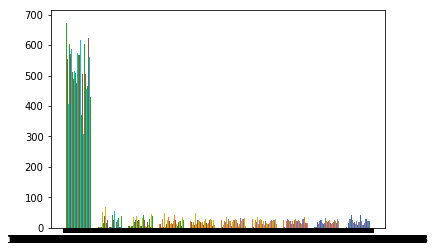

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dataLFQ)
#data.hist()

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


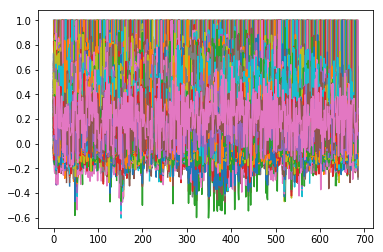

In [27]:
plt.plot(np.corrcoef(dataLFQ))

In [54]:
from scipy.stats import pearsonr
dataLFQ.ix[:,1]
pearsonr(dataLFQ.iloc[:,0],dataLFQ.iloc[:,1])


(0.29293554043091125, 4.62872390372297e-15)

([array([ 0.,  0.,  0.,  0.,  2.,  3.,  3.,  4.,  8., 63.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 83.]),
  array([ 0.,  1.,  0.,  0.,  3.,  3.,  6.,  6., 12., 52.]),
  array([ 0.,  1.,  0.,  1.,  4.,  4.,  5.,  7., 10., 51.]),
  array([ 0.,  0.,  0.,  3.,  6.,  1.,  4.,  3., 10., 56.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 83.]),
  array([ 2.,  3.,  7.,  7.,  6.,  5.,  4.,  2., 16., 31.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 83.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 81.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 83.]),
  array([ 0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  0., 78.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 82.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 82.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 82.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 82.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 83.]),
  array([ 0.,  0.,  0., 

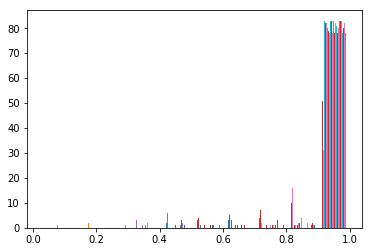

In [94]:
rowlen=len(dataLFQ.index)
corcol=dataLFQ.corr()
tstat=r*np.sqrt((n-2)/(1-r*r))
import scipy.stats as ss
#ss.t.cdf(tstat, rowlen-2)[0,1]
pval=ss.t.cdf(tstat, rowlen-2)
#corcol.iloc[0,1]
plt.hist(pval)

In [95]:
pval

array([[1.        , 1.        , 1.        , ..., 0.98502599, 0.96845304,
        0.99993845],
       [1.        , 1.        , 0.99999999, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99999999, 1.        , ..., 0.91852939, 0.8973786 ,
        0.99738792],
       ...,
       [0.98502599, 1.        , 0.91852939, ..., 1.        , 1.        ,
        1.        ],
       [0.96845304, 1.        , 0.8973786 , ..., 1.        , 1.        ,
        1.        ],
       [0.99993845, 1.        , 0.99738792, ..., 1.        , 1.        ,
        1.        ]])

In [65]:
labels = pd.read_table("labels.txt")
labels.head()

,Name,Type-BioRepSample,Type,Condition,Replicate,Anything Else interesting to look for in this file?,BioRepSample,TechRepMS,Note,Heatmap interpretation,Chromatogram observations,Further notes,Color
0,4,TE-2,TE,TAM5 (E) - 2,2,All plasma proteins of great interest!,2.0,1.0,eluted,"Grouping within same samples: 4, 5_redo, 7_redo",OK,NaN,NaN
1,5_redo,TE-3,TE,TAM5 (E) - 3 redo,3 - redo,All plasma proteins of great interest!,3.0,2.0,eluted,"Grouping within same samples: 4, 5_redo, 7_redo",OK,NaN,NaN
2,7_redo,TE-5,TE,TAM5 (E) - 5 redo,5 - redo,All plasma proteins of great interest!,5.0,2.0,eluted,"Grouping within same samples: 4, 5_redo, 7_redo",OK,NaN,NaN
3,8_redo,TT-1,TT,TAM5 (T) - 1 redo,1 - redo,All plasma proteins of great interest!,1.0,2.0,trypsinated,"Grouping within same samples: 8_redo, 9_redo, ...",-,NaN,NaN
4,9_redo,TT-2,TT,TAM5 (T) - 2 redo,2 - redo,All plasma proteins of great interest!,2.0,2.0,trypsinated,"Grouping within same samples: 8_redo, 9_redo, ...",-,NaN,NaN


In [69]:
labels=labels.set_index('Name')
labels

,Type-BioRepSample,Type,Condition,Replicate,Anything Else interesting to look for in this file?,BioRepSample,TechRepMS,Note,Heatmap interpretation,Chromatogram observations,Further notes,Color
Name,,,,,,,,,,,,
4,TE-2,TE,TAM5 (E) - 2,2,All plasma proteins of great interest!,2.0,1.0,eluted,"Grouping within same samples: 4, 5_redo, 7_redo",OK,NaN,NaN
5_redo,TE-3,TE,TAM5 (E) - 3 redo,3 - redo,All plasma proteins of great interest!,3.0,2.0,eluted,"Grouping within same samples: 4, 5_redo, 7_redo",OK,NaN,NaN
7_redo,TE-5,TE,TAM5 (E) - 5 redo,5 - redo,All plasma proteins of great interest!,5.0,2.0,eluted,"Grouping within same samples: 4, 5_redo, 7_redo",OK,NaN,NaN
8_redo,TT-1,TT,TAM5 (T) - 1 redo,1 - redo,All plasma proteins of great interest!,1.0,2.0,trypsinated,"Grouping within same samples: 8_redo, 9_redo, ...",-,NaN,NaN
9_redo,TT-2,TT,TAM5 (T) - 2 redo,2 - redo,All plasma proteins of great interest!,2.0,2.0,trypsinated,"Grouping within same samples: 8_redo, 9_redo, ...",-,NaN,NaN
10_redo,TT-3,TT,TAM5 (T) - 3 redo,3 - redo,All plasma proteins of great interest!,3.0,2.0,trypsinated,"Grouping within same samples: 8_redo, 9_redo, ...",-,NaN,NaN
11_redo,TT-4,TT,TAM5 (T) - 4 redo,4 - redo,All plasma proteins of great interest!,4.0,2.0,trypsinated,"Grouping within same samples: 8_redo, 9_redo, ...",-,NaN,NaN
13,SAE-1,SAE,SA + A (E) - 1,1,All plasma proteins of great interest!,1.0,1.0,eluted,"Grouping within same samples: 13, 14_redo, 15_...",Maybe OK - but looks weird,"Outlier compared to samples: 14_redo, 15_redo,...",NaN
14_redo,SAE-2,SAE,SA + A (E) - 2 redo,2 - redo,All plasma proteins of great interest!,2.0,2.0,eluted,"Grouping within same samples: 13, 14_redo, 15_...",OK,NaN,NaN


In [96]:
len(dataLFQ.columns)
dataLFQ.columns

Index(['01_redo-t1', '01_redo-t2', '01-t1', '01-t2', '02_redo-t1',
       '02_redo-t2', '02-t1', '02-t2', '10', '10_redo', '11', '11_redo', '12',
       '12_redo', '13', '14', '14_redo', '15', '15_redo', '16', '16_redo',
       '17', '18', '19', '19_redo', '20', '21', '22', '22_redo', '23', '24',
       '24_redo', '25', '26', '27', '27_redo', '28', '28_redo', '29', '3',
       '30', '31', '32', '33', '34', '35', '35_redo', '36', '37', '38',
       '38_redo', '39', '4', '40', '41', '42', '43', '43_redo', '44',
       '44_redo', '45', '46', '47', '47_redo', '48', '49', '5', '5_redo', '50',
       '51', '51_redo', '52', '53_redo_t1', '53_redo_t2', '53_redo_t3',
       '53_t1', '6', '7', '7_redo', '8', '8_redo', '9', '9_redo'],
      dtype='object')

In [91]:
labels.index

Index([         '4',     '5_redo',     '7_redo',     '8_redo',     '9_redo',
          '10_redo',    '11_redo',         '13',    '14_redo',    '15_redo',
          '16_redo',    '19_redo',    '22_redo',         '23',    '24_redo',
               '25',         '26',         '28',    '28_redo',         '29',
               '30',         '31',         '32',         '34',         '35',
          '35_redo',         '36',         '37',    '38_redo',         '39',
               '40',         '41',         '42',    '43_redo',         '45',
               '46',         '48',         '49',         '50',         '51',
          '51_redo',         '52', '53_redo_t1', '53_redo_t2', '53_redo_t3',
                nan, '01_redo-t1', '01_redo-t2',      '01-t1',      '01-t2',
       '02_redo-t1', '02_redo-t2',      '02-t1',      '02-t2',          '3',
          '12_redo',         '16',         '18',         '21',         '22',
               '24',         '27',    '27_redo',         '33',         '38',

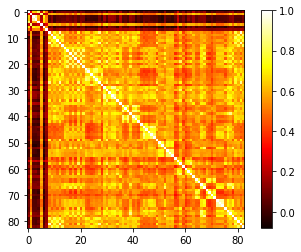

In [106]:
plt.imshow(corcol, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [113]:
plt.savefig('test.png', dpi=300)

<Figure size 432x288 with 0 Axes>

In [112]:
np.savetxt(r'test.txt',pval,delimiter='\t')